# Metrics comparison

In [1]:
%load_ext autoreload

In [35]:
import os, sys, importlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [38]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
sys.path.append(MODULES_PATH)

import active_learning
importlib.reload(active_learning)
from active_learning import Metrics

In [39]:
METRICS_PATH = os.path.join(BASE_PATH, "metrics", "old_metrics")
files = os.listdir(METRICS_PATH)

In [40]:
def get_acq_name(filename):
    """
        Decodes the acquisition function name from the filename.
        
        Parameters:
            filename (str): The filename for example 'mc_dropout_max_entropy.csv'
        
        Returns:
            (str) the acquisition function name used for the metrics inside the file.
    """
    name, ext = filename.split(".")
    
    if "bald" in name:
        return "BALD"
    
    elif "max_entropy" in name:
        return "Max Entropy"
    
    elif "max_var_ratio" in name:
        return "Var Ratios"
    
    elif "std_mean" in name:
        return "Mean STD"
    
    elif "random" in name:
        return "Random"
    
    raise ValueError("No acquisition function name encoded in filename: {}".format(name))

In [41]:
def get_model_name(filename):
    """
        Decodes the model name from the filename
        
        Parameters:
            filename (str): The filename for example 'mc_dropout_max_entropy.csv'
        
        Returns:
            (str) the neural network model name
    """
    
    name, ext = filename.split(".")
    
    if "moment_propagation" in name:
        return "Moment Propagation"
    
    elif "mc_dropout" in name:
        return "MC Dropout"
    
    raise ValueError("No model name encoded in filename: {}".format(name))

In [47]:
metrics_reader = Metrics(METRICS_PATH)

In [62]:
list(filter(lambda x: "mc_dropout" in x, files))

['mc_dropout_std_mean.csv',
 'mc_dropout_max_var_ratio.csv',
 'mc_dropout_max_entropy.csv',
 'mc_dropout_bald.csv']

In [109]:
# Aggregate actve leanring information for MC Models
mc_files = filter(lambda x: "mc_dropout" in x, files)

main_df = pd.DataFrame()
for file in mc_files:
    model = "MC Dropout"
    acq_name = get_acq_name(file)
    
    data = metrics_reader.read(file)
    df = pd.DataFrame(data)
    df = df.rename(columns={"binary_accuracy": "accuracy"})
    df.insert(2, "Acquisition Function", [acq_name]*len(data))
    main_df = pd.concat([main_dataframe, df])
    
main_df = main_df.astype({"iteration": "int32", "loss": "float32", "accuracy": "float32"})
main_df.dtypes

iteration                 int32
loss                    float32
Acquisition Function     object
accuracy                float32
dtype: object

<Figure size 1440x7200 with 0 Axes>

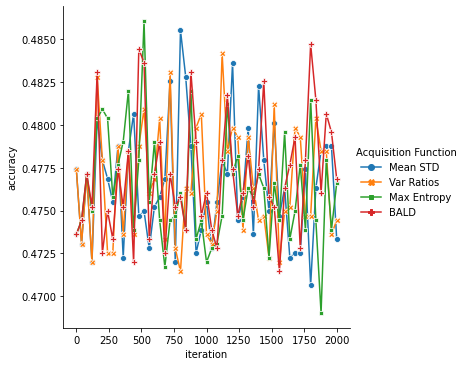

In [113]:
plt.figure(figsize=(20, 100))
sns.relplot(x="iteration", y="accuracy", kind="line", markers=True, dashes=False, style="Acquisition Function", ci=None, hue="Acquisition Function", data=main_df)

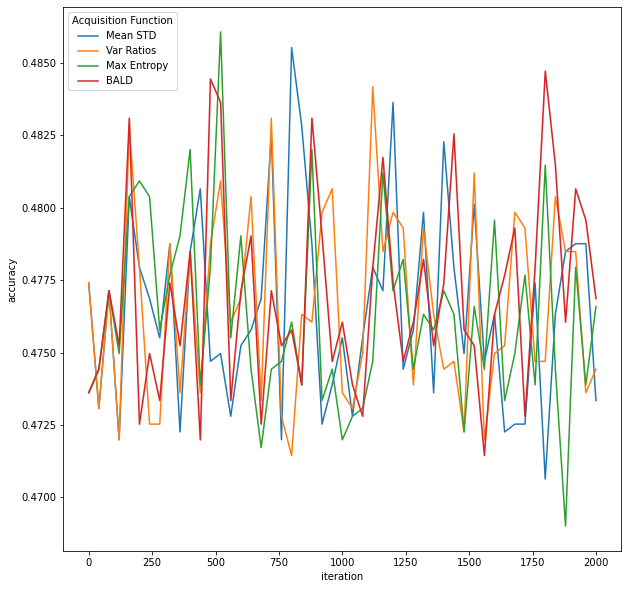

In [117]:
plt.figure(figsize=(10, 10))
sns.lineplot(x="iteration", y="accuracy",  hue="Acquisition Function", data=main_df)